In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
comps = pd.read_csv('../data/percentage-of-schools-with-comps-2013-2016.csv')
comps.head()

State_UT     year  Primary_Only  Primary_with_U_Primary  \
0  Andaman & Nicobar Islands  2013-14         30.40                   73.68   
1  Andaman & Nicobar Islands  2014-15         30.94                   76.54   
2  Andaman & Nicobar Islands  2015-16         28.44                   78.57   
3             Andhra Pradesh  2013-14         12.73                   42.72   
4             Andhra Pradesh  2014-15         10.29                   44.15   

   Primary_with_U_Primary_Sec_HrSec  U_Primary_Only  U_Primary_With_Sec_HrSec  \
0                             89.74            0.00                    100.00   
1                             92.11          100.00                     94.74   
2                             92.50            0.00                     94.74   
3                             86.99           45.45                     17.07   
4                             88.46           50.00                     62.22   

   Primary_with_U_Primary_Sec  U_Primary_With_Sec  Sec_Only  Sec_with_HrSec.  \
0                       97.92                0.00      0.00           100.00   
1                      100.00                0.00      0.00           100.00   
2                      100.00                0.00      0.00           100.00   
3                       68.18               73.23     60.00            33.33   
4                       68.38               76.59     70.97            66.67   

   HrSec_Only  All Schools  
0        0.00        53.06  
1        0.00        57.25  
2        0.00        57.00  
3       19.32        29.57  
4       41.60        28.06

In [3]:
from pandas_profiling import ProfileReport
prof = ProfileReport(comps)
prof

In [5]:
comps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   State_UT                          110 non-null    object 
 1   year                              110 non-null    object 
 2   Primary_Only                      110 non-null    float64
 3   Primary_with_U_Primary            110 non-null    float64
 4   Primary_with_U_Primary_Sec_HrSec  110 non-null    float64
 5   U_Primary_Only                    110 non-null    float64
 6   U_Primary_With_Sec_HrSec          110 non-null    float64
 7   Primary_with_U_Primary_Sec        110 non-null    float64
 8   U_Primary_With_Sec                110 non-null    float64
 9   Sec_Only                          110 non-null    float64
 10  Sec_with_HrSec.                   110 non-null    float64
 11  HrSec_Only                        110 non-null    float64
 12  All Scho

In [6]:
comps['State_UT'].unique()

array(['Andaman & Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra & Nagar Haveli', 'Daman & Diu', 'Delhi', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu And Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal', 'All India'], dtype=object)

In [7]:
comps.columns

Index(['State_UT', 'year', 'Primary_Only', 'Primary_with_U_Primary',
       'Primary_with_U_Primary_Sec_HrSec', 'U_Primary_Only',
       'U_Primary_With_Sec_HrSec', 'Primary_with_U_Primary_Sec',
       'U_Primary_With_Sec', 'Sec_Only', 'Sec_with_HrSec.', 'HrSec_Only',
       'All Schools'],
      dtype='object')

In [8]:
schools_only = comps[['State_UT','year','Primary_Only','U_Primary_Only','Sec_Only','HrSec_Only']]
schools_only.head()
schools_ai = schools_only[schools_only['State_UT']=='All India'].reset_index(drop=True)
schools_ai

State_UT     year  Primary_Only  U_Primary_Only  Sec_Only  HrSec_Only
0  All India  2013-14          9.25           18.22     44.80       26.65
1  All India  2014-15         10.32           19.40     51.27       47.96
2  All India  2015-16         10.36           19.78     53.05       55.72

In [64]:
plt.style.use('seaborn')
plt.rc('figure', figsize=(10, 8))  # to make all the graph the same size

In [90]:
all_india = comps_melted[comps_melted['State_UT'] == 'All India'].reset_index(drop=True)
all_india
all_india = all_india.groupby(['year', 'School_Level'], as_index=False).sum()
all_india.head()

year                School_Level  Value
0  2013-14                 All Schools  24.08
1  2013-14                  HrSec_Only  26.65
2  2013-14                Primary_Only   9.25
3  2013-14      Primary_with_U_Primary  42.14
4  2013-14  Primary_with_U_Primary_Sec  64.69

### Change in percentage of computer facilities in India Schools for the three academic year

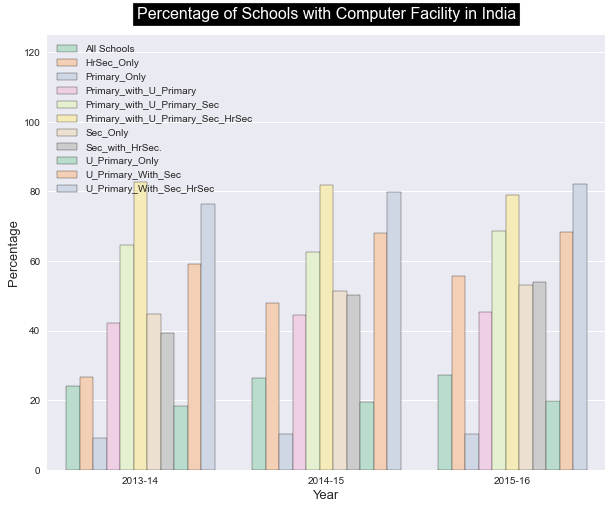

In [89]:
fig, ax = plt.subplots()
bar = sns.barplot(x="year",y='Value',hue='School_Level',data=all_india ,palette = 'Pastel2',edgecolor='black',ax=ax)
bar.set(ylim=(0, 125))
# highlighting the title
ax.set_title('Percentage of Schools with Computer Facility in India',size = 16 , pad = 16, color='white',bbox=dict(facecolor='black', alpha=1.0))

ax.set_ylabel('Percentage',size=13)
ax.set_xlabel('Year',size=13)

bar.legend(fancybox=True, framealpha=1, borderpad=0.5)

In [14]:
comps.sort_values('year', inplace=True)
#comps.head()

In [16]:
comps_melted = pd.melt(comps, id_vars=['State_UT', 'year'], var_name='School_Level', value_name = 'Value')
comps_melted.head(10)

State_UT     year  School_Level  Value
0  Andaman & Nicobar Islands  2013-14  Primary_Only  30.40
1                    Gujarat  2013-14  Primary_Only  24.74
2                    Haryana  2013-14  Primary_Only   7.43
3           Himachal Pradesh  2013-14  Primary_Only   3.75
4          Jammu And Kashmir  2013-14  Primary_Only   3.60
5                  Jharkhand  2013-14  Primary_Only   3.10
6                  Karnataka  2013-14  Primary_Only   9.94
7                     Kerala  2013-14  Primary_Only  87.96
8             Madhya Pradesh  2013-14  Primary_Only   3.33
9                Maharashtra  2013-14  Primary_Only  28.60

### Which India State had the highest percentage of computer facilities in Primary School Level?

<AxesSubplot:title={'center':'Percentage of Primary Schools with Computer Facilities'}, xlabel='State_UT'>

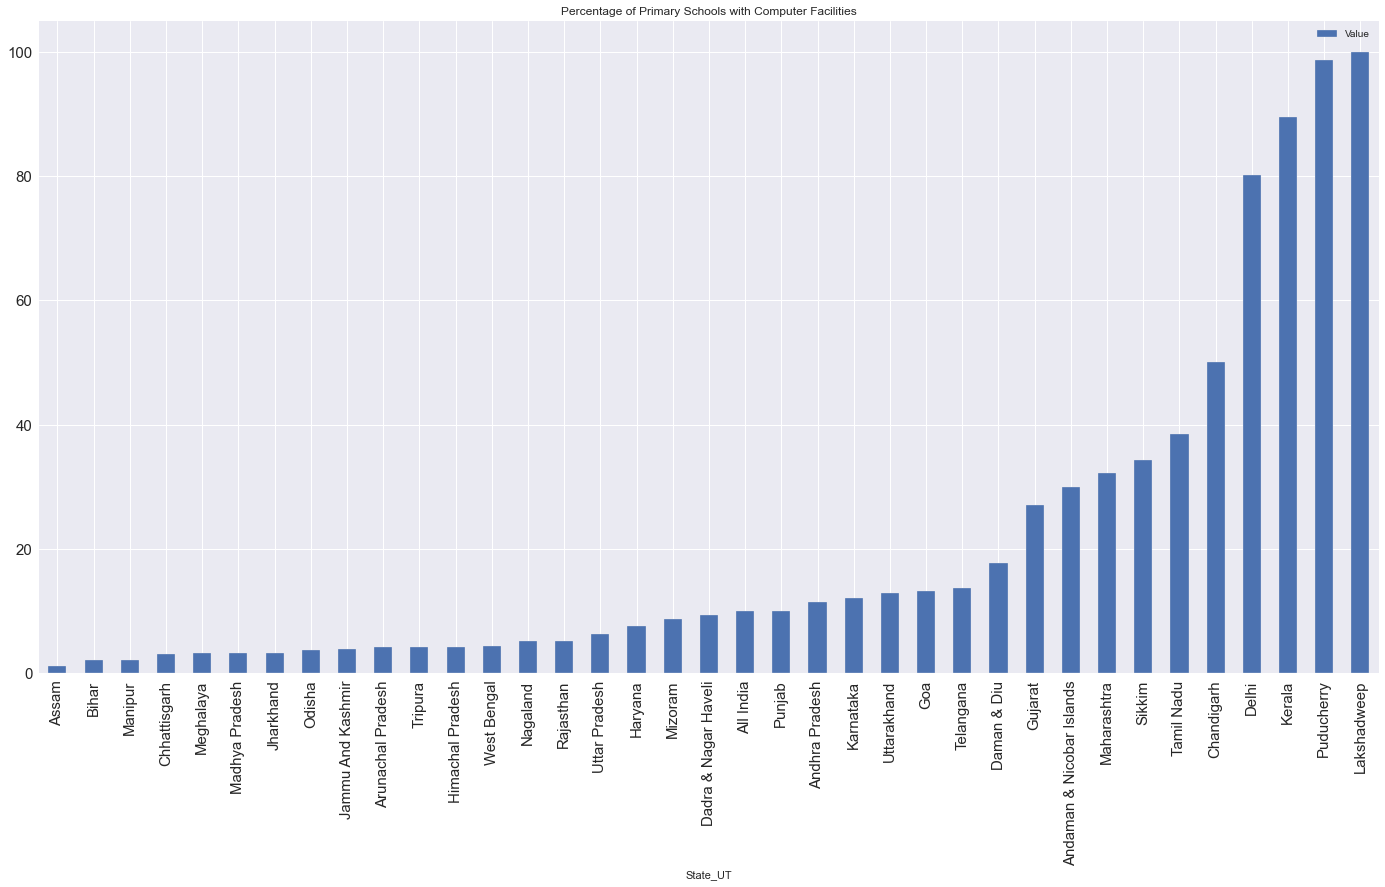

In [69]:
primary = comps_melted[comps_melted['School_Level'] == 'Primary_Only']
mean_primary = primary.groupby(['State_UT'], as_index=False).mean()
mean_primary.set_index('State_UT').sort_values('Value').plot(kind='bar', fontsize = 15, figsize=(24,12), title ='Percentage of Primary Schools with Computer Facilities')

From the bar chart above, we can conclude that 'Lakshadweep' had the highest percentage (100%) of computer facilities in Primary School Category while 'Assam' had the lowest percentage of computer facilities in the three academic years.

### Which India State had the highest percentage of computer facilities in Upper Primary School Level?

<AxesSubplot:title={'center':'Percentage of Upper Primary Schools with Computer Facilities'}, xlabel='State_UT'>

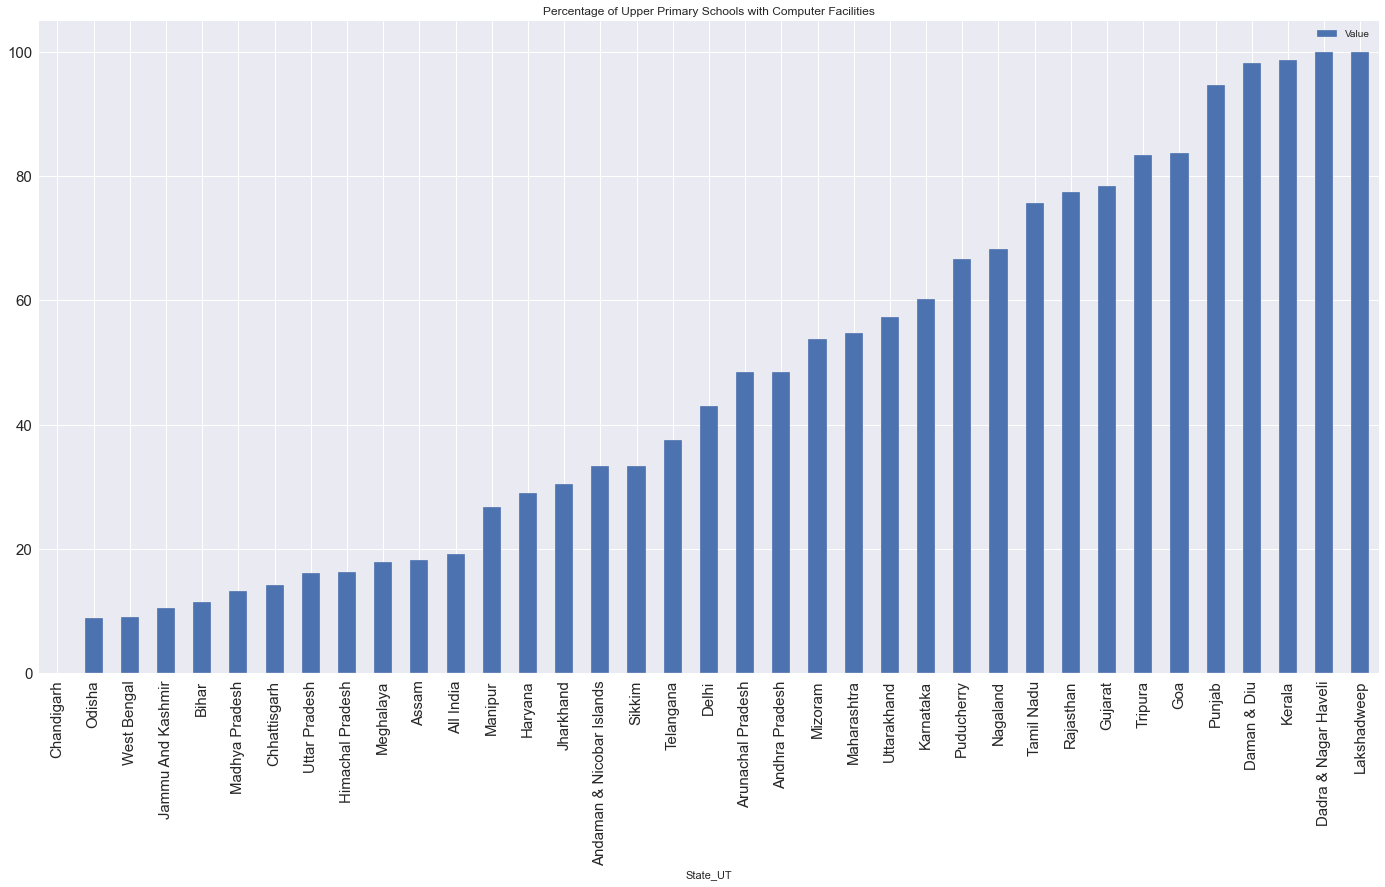

In [70]:
u_primary = comps_melted[comps_melted['School_Level'] == 'U_Primary_Only']
mean_u_primary = u_primary.groupby(['State_UT'], as_index=False).mean()
mean_u_primary.set_index('State_UT').sort_values('Value').plot(kind='bar', fontsize = 15, figsize=(24,12), title ='Percentage of Upper Primary Schools with Computer Facilities')

From the bar chart above, we can conclude that 'Lakshadweep' had the highest percentage (100%) of computer facilities in Upper Primary Schools Category while 'Chandigarh' had the lowest percentage (0%) of computer facilities in Upper primary Schools Category for the three academc years. This indicates that no upper primary school in Chandigarh had access to computer facilities.

### Which India State had the highest percentage of computer facilities in Secondary Level?

<AxesSubplot:title={'center':'Percentage of Secondary Schools with Computer Facilities'}, xlabel='State_UT'>

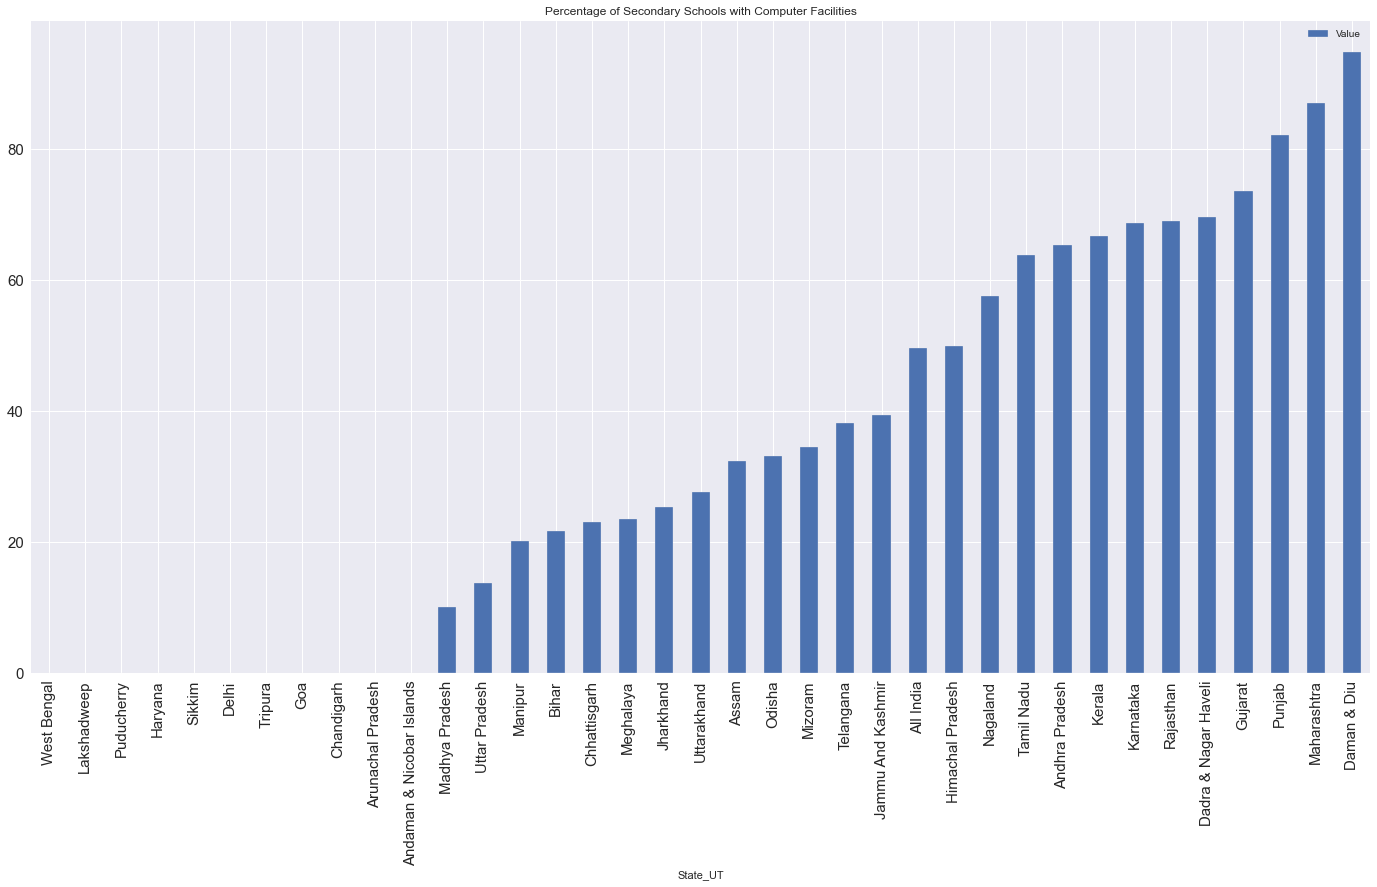

In [68]:
secondary = comps_melted[comps_melted['School_Level'] == 'Sec_Only']
mean_secondary = secondary.groupby(['State_UT'], as_index=False).mean()
mean_secondary.set_index('State_UT').sort_values('Value').plot(kind='bar', fontsize = 15, figsize=(24,12), title ='Percentage of Secondary Schools with Computer Facilities')

From the barchart above, 'Daman & Diu' had the highest percentage of computer facilities in Secondary Schools while 'West Bengal, Lakshadweep, Puducherry, Haryana, Sikkim, Delhi, Tripura, Goa, Chandigarh, Arunachal Pradesh and Andaman & Nicobar Islands' had the lowest percentage (0%) of computer facilities in Secondary Schools in the three academic years

### Which India State had the highest percentage of computer facilities in Higher Secondary Level?

<AxesSubplot:title={'center':'Percentage of Higer Secondary Schools with Computer Facilities'}, xlabel='State_UT'>

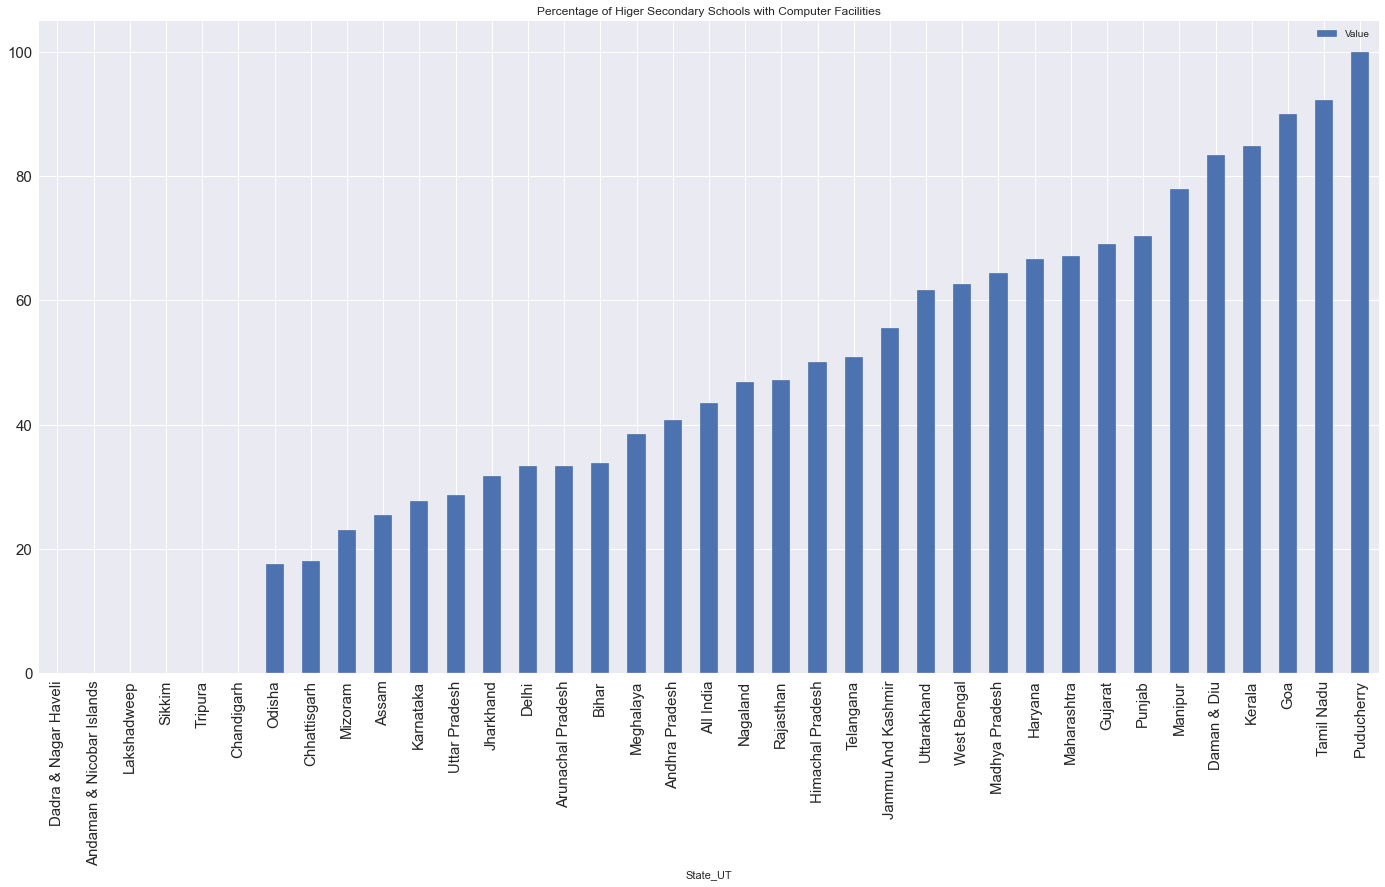

In [71]:
h_secondary = comps_melted[comps_melted['School_Level'] == 'HrSec_Only']
mean_h_secondary = h_secondary.groupby(['State_UT'], as_index=False).mean()
mean_h_secondary.set_index('State_UT').sort_values('Value').plot(kind='bar', fontsize = 15, figsize=(24,12), title ='Percentage of Higer Secondary Schools with Computer Facilities')

'Puducherry' had the highest percentage of comupter facilities in Higher Secondary Schools while 'Dadra & Nagar Haveli, Andaman & Nicobar Islands, Lakshadweep, Sikkim, Tripura and Chandigarh' had the lowest percentage of computer facilities in Higher Secondary Schools for the three academic years.

In [72]:
import seaborn as sns
#comps.head()

In [73]:
mean_comps = comps.groupby(['State_UT']).mean()
mean_comps.head()

<AxesSubplot:title={'center':'Percentage of Computer Facilities per State.'}, ylabel='State_UT'>

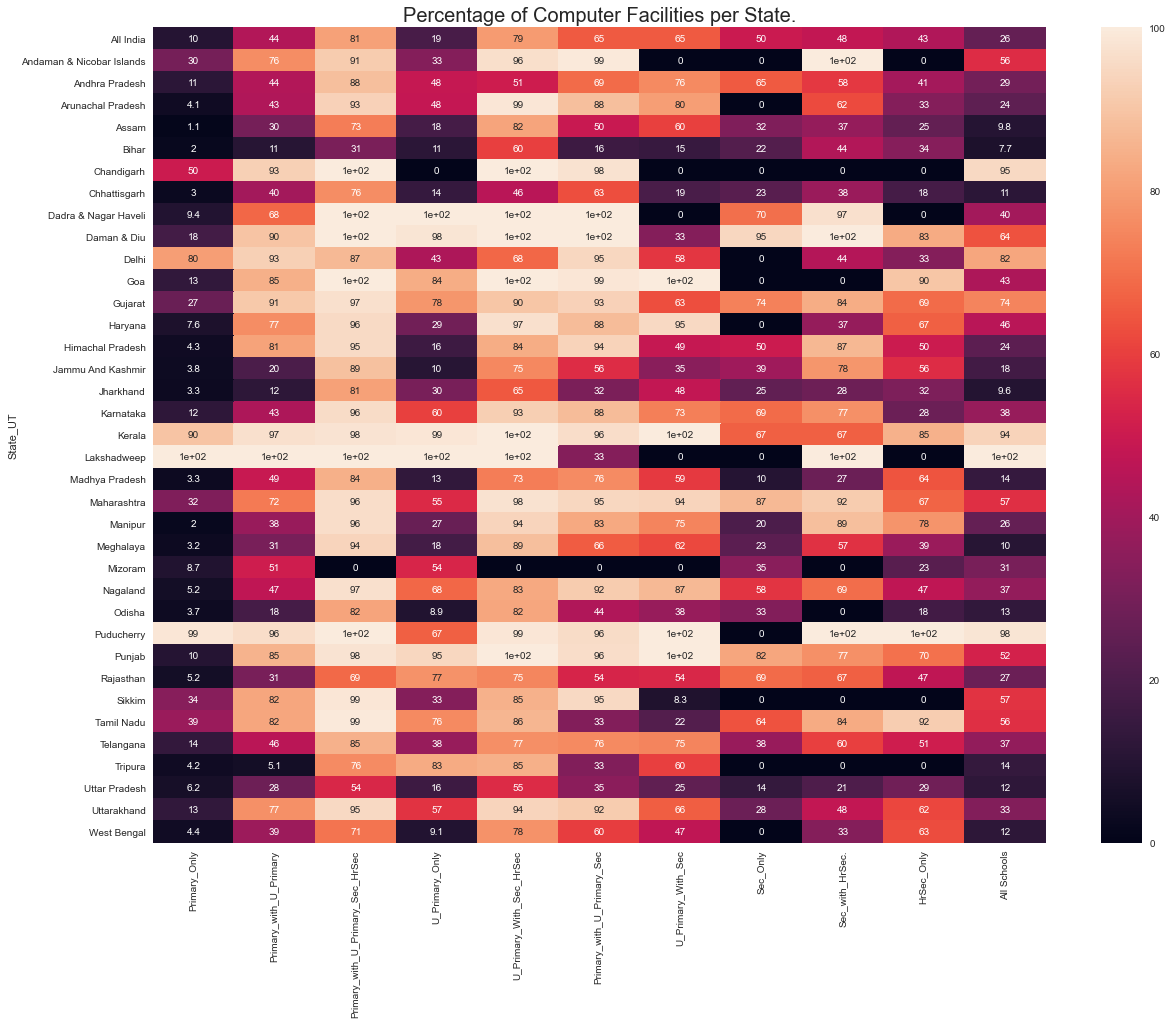

In [76]:
plt.figure(figsize=(20,15))
plt.rc('axes', titlesize=20)
plt.title('Percentage of Computer Facilities per State.')
sns.heatmap(mean_comps, annot=True)

### Which India state had the highest percentage of computer facilities in all School Levels?

In [83]:
all_schools = comps.loc[:,['State_UT','All Schools']]
all_schools = all_schools.groupby('State_UT', as_index=False).mean()
all_schools.head(10)

37

<AxesSubplot:title={'center':'Percentage of All Schools with Computer Facilities per State'}, xlabel='State_UT'>

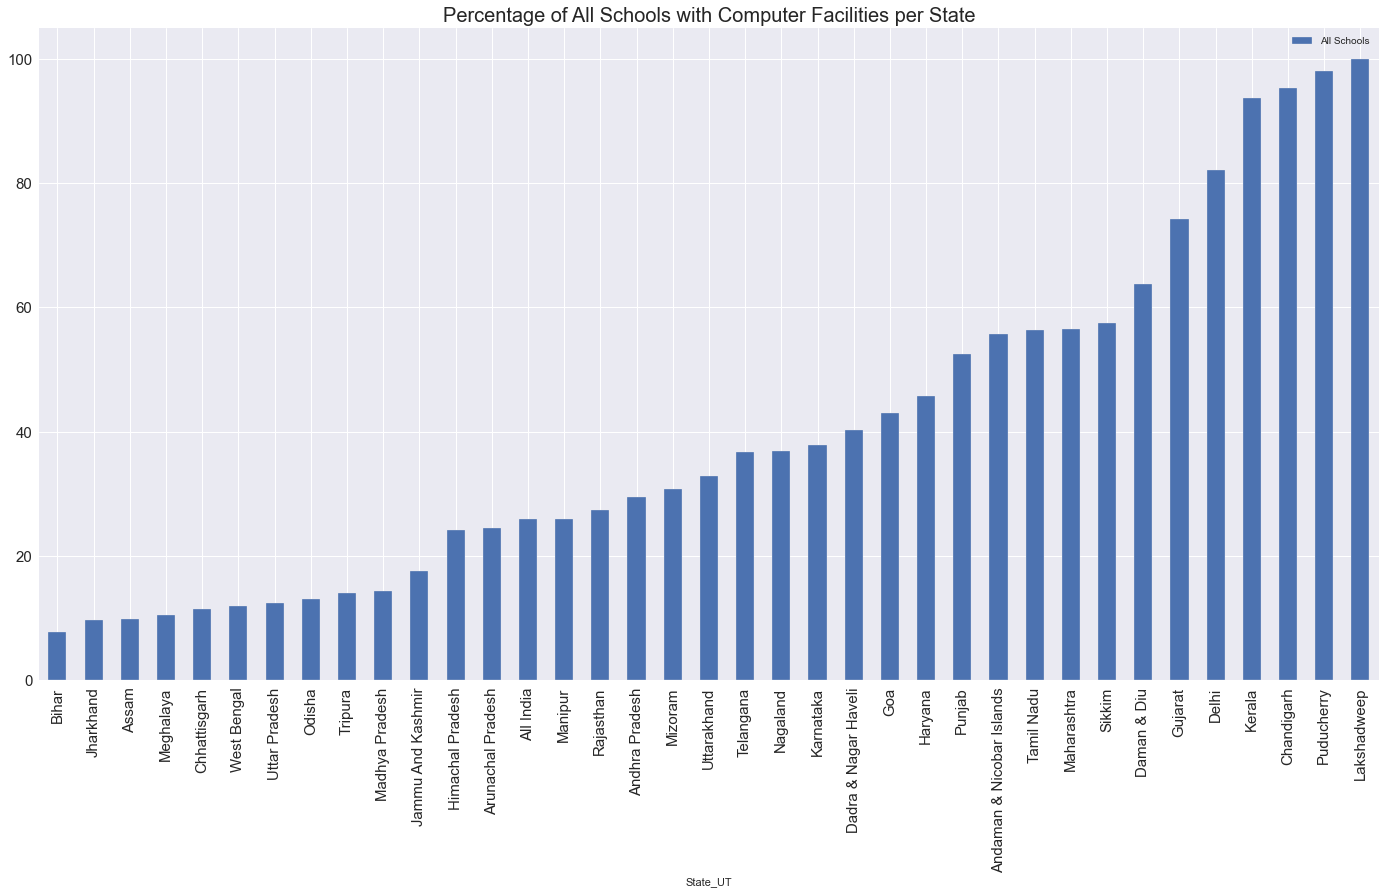

In [82]:
all_schools.set_index('State_UT').sort_values('All Schools').plot(kind='bar', fontsize = 15, figsize=(24,12), title ='Percentage of All Schools with Computer Facilities per State')

For all School Levels, 'Lakshadweep' had the highest percentage of computer facilities while 'Bihar' had the lowest percentage of computer facilities in all three academic years.